### Student Information
Name: 廖榮健

Student ID: 411855165

GitHub ID: https://github.com/bryankb10

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [153]:
### Begin Assignment Here
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


1. Read the csv file and only choose the columns needed

In [154]:
import helpers.data_mining_helpers as dmh

df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv", usecols = ['type', 'datetime','subreddit', 'author', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'entities', 'sentiment'])
df

,type,datetime,subreddit,author,upvotes,downvotes,upvote_ratio,text,sentiment,entities
0,comment,2025-04-11 17:29:56,wallstreetbets,StickyTip420,0,NaN,NaN,Calls on retards,-1.0,[]
1,comment,2025-04-12 1:12:19,wallstreetbets,Comfortable-Dog-8437,-15,NaN,NaN,Stunt as in like why did they even make a big ...,1.0,"['Stunt', 'company', 'deal', 'place']"
2,comment,2025-04-10 15:09:41,StockMarket,Btankersly66,1,NaN,NaN,Seeing lots of red in the ticker.,0.0,['ticker']
3,post,2023-08-30 17:12:55,stockstobuytoday,emiljenfn,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ..."
4,comment,2025-04-11 14:48:05,StockMarket,Just-Big6411,1,NaN,NaN,He didn’t say thank you.,0.0,[]
...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,stockstobuytoday,Ordinary-Office9180,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.0,['tomorrow']
843,comment,2025-04-11 5:01:24,StockMarket,lulububudu,2,NaN,NaN,Where can I read this?,0.0,[]
844,post,2025-03-24 12:30:39,stockstobuytoday,saasfin,1,0.0,1.00,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do..."
845,comment,2025-04-11 20:13:26,wallstreetbets,yes_ur_wrong,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.0,"['war', 'denmark', 'cheeto', 'i']"


In [155]:
len(df)

847

2. Check the first few records from the dataset

In [156]:
df.head(3)

,type,datetime,subreddit,author,upvotes,downvotes,upvote_ratio,text,sentiment,entities
0,comment,2025-04-11 17:29:56,wallstreetbets,StickyTip420,0,NaN,NaN,Calls on retards,-1.0,[]
1,comment,2025-04-12 1:12:19,wallstreetbets,Comfortable-Dog-8437,-15,NaN,NaN,Stunt as in like why did they even make a big ...,1.0,"['Stunt', 'company', 'deal', 'place']"
2,comment,2025-04-10 15:09:41,StockMarket,Btankersly66,1,NaN,NaN,Seeing lots of red in the ticker.,0.0,['ticker']


Exercise 1

In [157]:
for i, row in df[:3].iterrows():
    print(f"{i+1}. {row['subreddit']}")
    print(row['text'])
    print()

1. wallstreetbets
Calls on retards

2. wallstreetbets
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.

3. StockMarket
Seeing lots of red in the ticker.



Exercise 2

In [158]:
df[(df['subreddit'] == 'wallstreetbets') & 
   (df['upvotes'] > 50)]

,type,datetime,subreddit,author,upvotes,downvotes,upvote_ratio,text,sentiment,entities
28,comment,2025-04-11 17:21:44,wallstreetbets,PlannedObsolescence-,53,NaN,NaN,"My first wife was tarded, she's a pilot now.",1.0,"['pilot', 'wife']"
108,comment,2025-04-12 2:02:10,wallstreetbets,SupaRiceNinja,80,NaN,NaN,Carryover indefinitely for life of taxpayer,0.0,"['Carryover', 'life', 'taxpayer']"
326,comment,2025-04-12 1:51:01,wallstreetbets,RichardUkinsuch,59,NaN,NaN,Call jay gee went worth 8 seven seven cash meow,1.0,"['meow', 'gee', 'cash', 'jay']"


Exercise 3

In [159]:
df[df['subreddit'] == 'stocks'][::10][0:5]

,type,datetime,subreddit,author,upvotes,downvotes,upvote_ratio,text,sentiment,entities
6,comment,2025-04-11 12:37:23,stocks,stoniey84,5,NaN,NaN,Trump will respond to china increasing their t...,-1.0,"['JPow', 'Jerome', 'i', 'reporting', 'Trump', ..."
20,comment,2025-04-11 13:11:35,stocks,Golden__Eagle,5,NaN,NaN,Nooo dont go down its smug bull day,0.0,"['bull', 'day', 'dont', 'Nooo']"
49,comment,2025-04-11 16:01:45,stocks,CEOofBeanz,1,NaN,NaN,And you are? \r\n\r\nMarket. Mr. Market.,0.0,"['Mr.', 'Market']"
75,comment,2025-03-27 21:15:26,stocks,BugDisastrous5135,1,NaN,NaN,"""New to investing"" but almost $50k port. Ok th...",1.0,"['New', 'port']"
118,comment,2025-04-10 15:31:57,stocks,mealucra,1,NaN,NaN,Yikes...\r\n\r\n\r\nThis shitshow continually ...,-1.0,"['shitshow', 'spine', 'drumpf', 'news', 'rabid..."


3. Check for nulls and duplicates in the dataset

In [160]:
df.isnull().sum()

type              0
datetime          0
subreddit         0
author            0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
sentiment         0
entities          0
dtype: int64

Exercise 4

In [161]:
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amount of missing records is: , 2)
1      (The amount of missing records is: , 2)
2      (The amount of missing records is: , 2)
3      (The amount of missing records is: , 0)
4      (The amount of missing records is: , 2)
                        ...                   
842    (The amount of missing records is: , 2)
843    (The amount of missing records is: , 2)
844    (The amount of missing records is: , 0)
845    (The amount of missing records is: , 2)
846    (The amount of missing records is: , 2)
Length: 847, dtype: object

In [162]:
print(df.duplicated()) # check based on row
print()
duplicate_cols = df.T.duplicated()
print("Duplicate columns (content):")
print(duplicate_cols)

# To see which specific columns are duplicates:
print("\nNames of duplicate columns:")
print(df.columns[duplicate_cols])# check based on column

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844    False
845    False
846    False
Length: 847, dtype: bool

Duplicate columns (content):
type            False
datetime        False
subreddit       False
author          False
upvotes         False
downvotes       False
upvote_ratio    False
text            False
sentiment       False
entities        False
dtype: bool

Names of duplicate columns:
Index([], dtype='object')


4. drop all nulls

In [163]:
df.dropna(axis=1, inplace=True)

In [164]:
df

,type,datetime,subreddit,author,upvotes,text,sentiment,entities
0,comment,2025-04-11 17:29:56,wallstreetbets,StickyTip420,0,Calls on retards,-1.0,[]
1,comment,2025-04-12 1:12:19,wallstreetbets,Comfortable-Dog-8437,-15,Stunt as in like why did they even make a big ...,1.0,"['Stunt', 'company', 'deal', 'place']"
2,comment,2025-04-10 15:09:41,StockMarket,Btankersly66,1,Seeing lots of red in the ticker.,0.0,['ticker']
3,post,2023-08-30 17:12:55,stockstobuytoday,emiljenfn,30,Vision Marine Technologies Inc. is rewriting t...,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ..."
4,comment,2025-04-11 14:48:05,StockMarket,Just-Big6411,1,He didn’t say thank you.,0.0,[]
...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,stockstobuytoday,Ordinary-Office9180,1,Invest now it is going to shoot up tomorrow,0.0,['tomorrow']
843,comment,2025-04-11 5:01:24,StockMarket,lulububudu,2,Where can I read this?,0.0,[]
844,post,2025-03-24 12:30:39,stockstobuytoday,saasfin,1,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do..."
845,comment,2025-04-11 20:13:26,wallstreetbets,yes_ur_wrong,10,i sold my puts so i expect cheeto to declare w...,0.0,"['war', 'denmark', 'cheeto', 'i']"


5. Create new column that define the sentiments based on the value. -1 is bearish, 0 is neutral, and 1 is bullish

In [165]:
df['sentiment_label'] = df['sentiment'].map({-1.0: 'Negative', 0.0: 'Neutral', 1.0: 'Posittive'}) # add new sentiment_label column

In [166]:
df

,type,datetime,subreddit,author,upvotes,text,sentiment,entities,sentiment_label
0,comment,2025-04-11 17:29:56,wallstreetbets,StickyTip420,0,Calls on retards,-1.0,[],Negative
1,comment,2025-04-12 1:12:19,wallstreetbets,Comfortable-Dog-8437,-15,Stunt as in like why did they even make a big ...,1.0,"['Stunt', 'company', 'deal', 'place']",Posittive
2,comment,2025-04-10 15:09:41,StockMarket,Btankersly66,1,Seeing lots of red in the ticker.,0.0,['ticker'],Neutral
3,post,2023-08-30 17:12:55,stockstobuytoday,emiljenfn,30,Vision Marine Technologies Inc. is rewriting t...,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",Posittive
4,comment,2025-04-11 14:48:05,StockMarket,Just-Big6411,1,He didn’t say thank you.,0.0,[],Neutral
...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,stockstobuytoday,Ordinary-Office9180,1,Invest now it is going to shoot up tomorrow,0.0,['tomorrow'],Neutral
843,comment,2025-04-11 5:01:24,StockMarket,lulububudu,2,Where can I read this?,0.0,[],Neutral
844,post,2025-03-24 12:30:39,stockstobuytoday,saasfin,1,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",Neutral
845,comment,2025-04-11 20:13:26,wallstreetbets,yes_ur_wrong,10,i sold my puts so i expect cheeto to declare w...,0.0,"['war', 'denmark', 'cheeto', 'i']",Neutral


6. Create sample dataset 

In [167]:
df_sample = df.sample(n=400, random_state=42) #random state

In [168]:
len(df_sample)

400

In [169]:
df_sample[0:4]

,type,datetime,subreddit,author,upvotes,text,sentiment,entities,sentiment_label
457,comment,2025-04-11 15:42:58,StockMarket,IamNotaMonkeyRobot,1,"""We"" who?",0.0,[],Neutral
342,comment,2025-04-12 3:04:05,wallstreetbets,iPlayedHockeInHS,1,Chicken jockey,-1.0,"['jockey', 'Chicken']",Negative
280,comment,2025-04-10 14:40:26,StockMarket,Narradisall,2,Not great Bob,1.0,['Bob'],Posittive
275,comment,2025-04-12 2:27:29,wallstreetbets,ChristianLS,1,"Speak for yourself, my wife is being harder on...",1.0,"['BBQ', 'potato', 'anime', 'wife', 'level', 'S...",Posittive


In [170]:
# Compare category distributions
print("Subreddit distribution in X:")
print(df['subreddit'].value_counts())

print("Subreddit distribution in X_sample:")
print(df_sample['subreddit'].value_counts())

Subreddit distribution in X:
subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64
Subreddit distribution in X_sample:
subreddit
stocks              127
StockMarket         114
stockstobuytoday     88
wallstreetbets       71
Name: count, dtype: int64


Exercise 6

In [171]:
# df_sample is created by randomly selecting 1,000 rows from df, so its content changes with each run
# The rows in df_sample are shuffled, meaning their order differs from the original dataset df
# Since df_sample contains only 1,000 rows, the total count of each category in df_sample differs from df
# Random sampling can cause category proportions in df_sample to deviate slightly from those in df

7. Create bar plot for the subreddit of df, df_sample, and comparison bar plot for both datasets

Exercise 7

subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64


<Axes: title={'center': 'Subreddit distribution'}, xlabel='subreddit'>

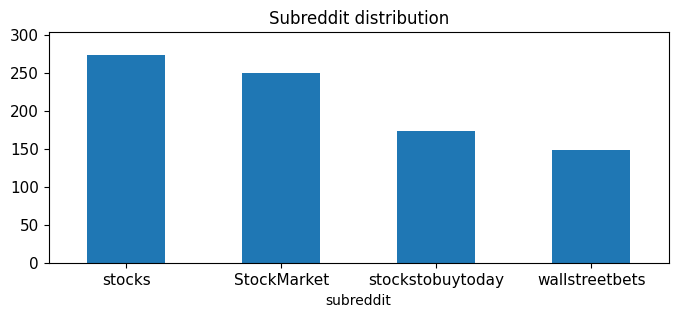

In [172]:
import matplotlib.pyplot as plt

print(df.subreddit.value_counts())

# This is the bar plot for df 
# plot barchart for X
df['subreddit'].value_counts().plot(kind = 'bar',
                                title = 'Subreddit distribution',
                                # the y limit is based on the highest count of df subreddit plus the offset
                                ylim = [0, df.subreddit.value_counts().max()+30],        
                                rot = 0, fontsize = 11, figsize = (8,3))

subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64


<Axes: title={'center': 'Subreddit distribution'}, xlabel='subreddit'>

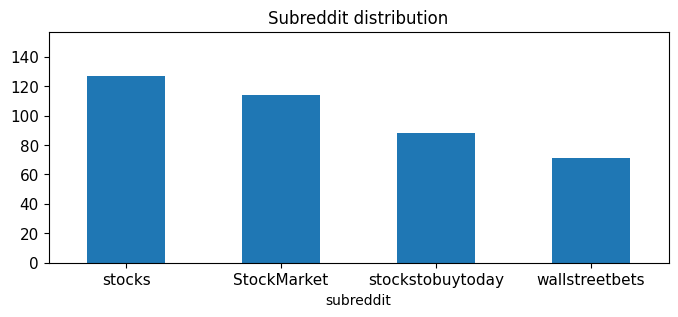

In [173]:
print(df.subreddit.value_counts())

# plot barchart for X
df_sample['subreddit'].value_counts().plot(kind = 'bar',
                                title = 'Subreddit distribution',
                                # the y limit is based on the highest count of df subreddit plus the offset
                                ylim = [0, df_sample.subreddit.value_counts().max()+30],        
                                rot = 0, fontsize = 11, figsize = (8,3))

Exercise 8

                   df  df_sample
subreddit                       
stocks            274        127
StockMarket       250        114
stockstobuytoday  174         88
wallstreetbets    149         71


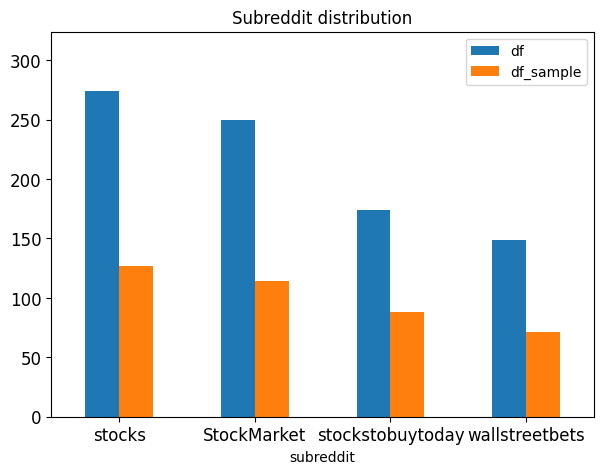

In [174]:
# Answer here
df_all = pd.DataFrame ({
    'df': df['subreddit'].value_counts(),
    'df_sample': df_sample['subreddit'].value_counts()})

print(df_all)

df_all.plot(
    kind = 'bar',
    title = 'Subreddit distribution',
    ylim = [0, df.subreddit.value_counts().max()+50], 
    rot = 0, fontsize = 12, figsize = (7,5))

plt.show()

In [175]:
import helpers.data_mining_helpers as dmh

nltk.download('stopwords')
nltk.download('punkt') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [176]:
import inspect
# This is for inspecting whether the function in dmh has been updated
print(inspect.getsource(dmh.tokenize_text_subreddit))

def tokenize_text_subreddit(text):
    stop_words = set(stopwords.words('english'))
    tokens = []
    for sentence in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sentence):
            if word.isalpha() and word.lower() not in stop_words:
                tokens.append(word)
    return tokens



8. add unigrams column in dataset to seperate every word from the text

In [177]:
df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text_subreddit(x))

In [178]:
df.head()

,type,datetime,subreddit,author,upvotes,text,sentiment,entities,sentiment_label,unigrams
0,comment,2025-04-11 17:29:56,wallstreetbets,StickyTip420,0,Calls on retards,-1.0,[],Negative,"[Calls, retards]"
1,comment,2025-04-12 1:12:19,wallstreetbets,Comfortable-Dog-8437,-15,Stunt as in like why did they even make a big ...,1.0,"['Stunt', 'company', 'deal', 'place']",Posittive,"[Stunt, like, even, make, big, deal, starting,..."
2,comment,2025-04-10 15:09:41,StockMarket,Btankersly66,1,Seeing lots of red in the ticker.,0.0,['ticker'],Neutral,"[Seeing, lots, red, ticker]"
3,post,2023-08-30 17:12:55,stockstobuytoday,emiljenfn,30,Vision Marine Technologies Inc. is rewriting t...,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",Posittive,"[Vision, Marine, Technologies, rewriting, wate..."
4,comment,2025-04-11 14:48:05,StockMarket,Just-Big6411,1,He didn’t say thank you.,0.0,[],Neutral,"[say, thank]"


In [179]:
df.loc[1, 'unigrams']

['Stunt',
 'like',
 'even',
 'make',
 'big',
 'deal',
 'starting',
 'first',
 'place',
 'company',
 'ever',
 'talk',
 'politics',
 'ever']

9. Transform df['text'] into a matrix of word counts to be used for terms visualization

In [180]:
from sklearn.feature_extraction.text import CountVectorizer

# Remove stop_words and punctuation
count_vect = CountVectorizer(tokenizer=dmh.tokenize_text_subreddit)
df_counts = count_vect.fit_transform(df['text'])

C:\Users\BK\Data_Mining\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [181]:
print(count_vect.get_feature_names_out()[3696])
print(count_vect.get_feature_names_out()[175])
print(count_vect.get_feature_names_out()[675])

unwinding
appointments
community


Exercise 9

In [182]:
analyze = count_vect.build_analyzer()
analyze(df.text[1])

['stunt',
 'like',
 'even',
 'make',
 'big',
 'deal',
 'starting',
 'first',
 'place',
 'company',
 'ever',
 'talk',
 'politics',
 'ever']

Exercise 10

In [183]:
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [184]:
third_record = df_counts[3, :100]

#When you slice columns like :100, you're creating a new sparse submatrix that only includes columns 0 through 99.
# Now, when you call .nonzero() on this sliced view, the resulting column indices are relative to the slice, 
# and — crucially — SciPy often returns them in sorted order for small, contiguous slices, 
# especially when the underlying format is CSR (Compressed Sparse Row).
# So for X_counts[4, :100].nonzero()[1], you get something like [0, 37] — sorted,
# and relative to the slice (so 37 means global column 37).

#X_counts[4] → not sorted
# This returns a (1, n_features) sparse matrix (a row vector).
# Now, when you call .nonzero() on it, you get all non-zero column indices in the entire row.
# Even though CSR format stores column indices in sorted order per row, there’s a catch:
# When you index a single row like X_counts[4], SciPy may return a sparse matrix in a different format (e.g., COO), 
# or preserve the internal order but not guarantee sorted output from .nonzero() in all contexts. 
# In a properly formed CSR matrix from CountVectorizer, the column indices for each row are stored in ascending order.
# So if you’re seeing [14887, 31077, 32493, 16916, ...], that suggests one of two things:
# The matrix is not in CSR format (maybe it’s COO or CSC), or
# You’re looking at a row that was modified or concatenated, breaking the sort order.
# But CountVectorizer outputs CSR by default, and row slicing preserves CSR.

col_indices = third_record.nonzero()[1]

second_term = count_vect.get_feature_names_out()[col_indices[2]]

print(f"The third 1 in the third record (by column order) represents the term '{second_term}' at position {col_indices[2]}")

The third 1 in the third record (by column order) represents the term 'achievement' at position 22


10. Create a heatmap to show the relationship between the most used terms and the documents using the most top 30 terms

Exercise 11

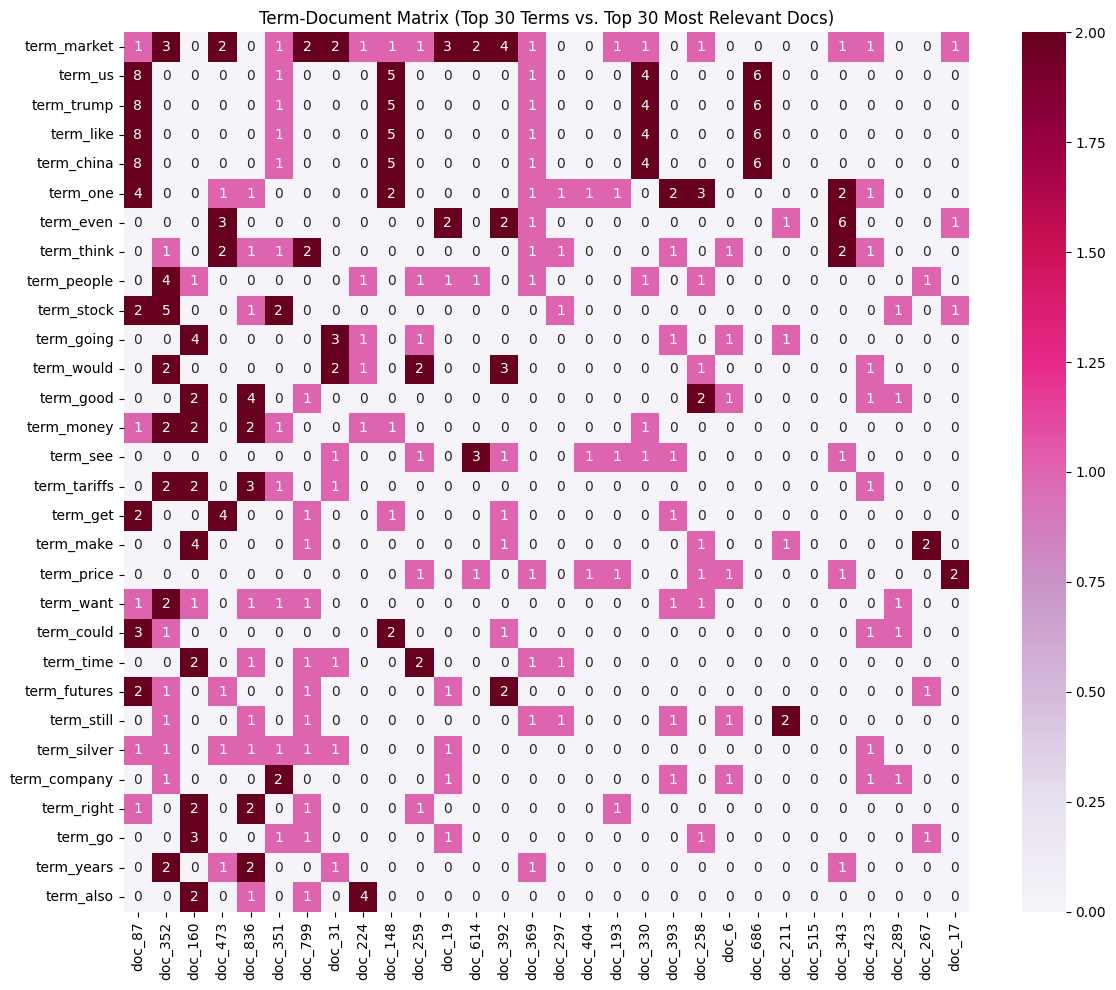

In [198]:
import seaborn as sns

top_n = 30

# Total count of each term across the entire corpus (sum over documents)
term_frequency = np.asarray(df_counts.sum(axis=0))[0]

# Indices of the top 30 most frequent terms (sorted descending)
top_indices = term_frequency.argsort()[-top_n:][::-1]
top_terms = count_vect.get_feature_names_out()[top_indices]

# Score each document by how many of the top terms it contains
doc_scores = df_counts[:, top_indices].sum(axis=1).A1 # A1 converts sparse matrix to 1D array

# Get indices of the 15 documents that use the top terms most heavily
top_doc_indices = doc_scores.argsort()[-top_n:][::-1]

# Label rows/columns for the heatmap
plot_x = ["doc_" + str(i) for i in df.index[top_doc_indices]]  # top docs (columns)
plot_y = ["term_" + str(t) for t in top_terms]                # top terms (rows)

# Extract submatrix: top docs (rows) × top terms (columns)
plot_z = df_counts[top_doc_indices][:, top_indices].toarray()

# Create DataFrame for heatmap (terms as rows, docs as columns)
df_heatmap = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)


# Plot heatmap
plt.figure(figsize=(12, 10))
ax = sns.heatmap(
    df_heatmap,
    cmap="PuRd",
    vmin=0,
    vmax=np.percentile(plot_z, 95),  # cap color scale to reduce outlier impact
    annot=True                       # show counts in cells
)
plt.xticks(rotation=90)
plt.title("Term-Document Matrix (Top 30 Terms vs. Top 30 Most Relevant Docs)")
plt.tight_layout()
plt.show()

11. Create bar plot to show the first 50 used terms

Exercise 12

In [186]:
# Answer here
import plotly.express as px

first_term = 50
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]


df_terms = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[:first_term],
    'Frequency': term_frequencies[:first_term]
})

# Create interactive bar chart
fig = px.bar(
    df_terms,
    x='Term',
    y='Frequency',
    title=f'Frequency of First {first_term} Terms',
    labels={'Term': 'Terms', 'Frequency': 'Frequency'},
    color='Frequency',               
    color_continuous_scale='Blues',
    text='Frequency'    
)

# Improve layout for readability
fig.update_layout(
    xaxis_tickangle=-45,           # slightly rotated for readability
    height=600,                     # taller for more space
    width=1200,                     # wider for many bars
    showlegend=False                # optional: hide legend if not needed
)

# Optional: Add hover info
fig.update_traces(
    hovertemplate="<b>%{x}</b><br>Frequency: %{y}<extra></extra>"
)

fig.show()

12. Create bar plot to show the top 50 used terms

Exercise 13

In [187]:
# Get total frequencies
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

# Step 1: Select top  most frequent terms (smart reduction)
top_n = 50
top_indices = term_frequencies.argsort()[-top_n:][::-1]

# Step 2: Create DataFrame and and sort alphabetically based on the top 50
df_terms = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[top_indices],
    'Frequency': term_frequencies[top_indices]
}).sort_values('Term')

fig = px.bar(
    df_terms,
    x='Term',
    y='Frequency',
    title=f'Frequency of Top {top_n} Terms in Alphabhetical order',
    labels={'Term': 'Terms', 'Frequency': 'Frequency'},
    color='Frequency',              
    color_continuous_scale='Blues',
    text='Frequency'   
)

# Improve layout for readability
fig.update_layout(
    xaxis_tickangle=-45,           # slightly rotated for readability
    height=600,                     # taller for more space
    width=1200,                     # wider for many bars
    showlegend=False                # optional: hide legend if not needed
)

# Optional: Add hover info
fig.update_traces(
    hovertemplate="<b>%{x}</b><br>Frequency: %{y}<extra></extra>"
)
fig.show()

Exercise 14

In [188]:
import plotly.express as px

# Get total frequency of each term across all documents
term_frequency = np.asarray(df_counts.sum(axis=0))[0]
top_n = 50

# Find indices of top 50 most frequent terms
top_indices = term_frequency.argsort()[-top_n:][::-1]

# Create DataFrame with top terms and their frequencies
df_terms = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[top_indices],
    'Frequency': term_frequency[top_indices]
})

print(df_terms.to_string())

# Create interactive bar chart
fig = px.bar(
    df_terms,
    x='Term',
    y='Frequency',
    title=f'Bar Plot of Frequency of Top {top_n} Terms',
    labels={'Term': 'Terms', 'Frequency': 'Frequency'},
    color='Frequency',               # Color bars by frequency
    color_continuous_scale='Blues',
    text='Frequency'                # Show count on each bar
)

# Improve layout
fig.update_layout(
    xaxis_tickangle=-45,   # Rotate x-axis labels
    height=600,
    width=1200
)

# Customize hover tooltip
fig.update_traces(
    hovertemplate="<b>%{x}</b><br>Frequency: %{y}<extra></extra>"
)

fig.show()

         Term  Frequency
0      market        108
1          us         95
2       trump         92
3        like         83
4       china         72
5         one         53
6        even         52
7       think         51
8      people         51
9       stock         51
10      going         50
11      would         46
12       good         46
13      money         46
14        see         43
15    tariffs         39
16        get         37
17       make         36
18      price         36
19       want         35
20      could         34
21       time         33
22    futures         30
23      still         28
24     silver         28
25    company         28
26      right         27
27         go         27
28      years         27
29       also         26
30      today         26
31      world         26
32        day         25
33       much         25
34      first         24
35       last         24
36     dollar         24
37    economy         24
38        way         24


Exercise 15

In [189]:
# Get total frequency of each term across all documents
term_frequency = np.asarray(df_counts.sum(axis=0))[0]
top_n = 50

term_frequency_log = [math.log(i) for i in term_frequency]

term_frequency_log = np.array(term_frequency_log)

# Find indices of top 50 most frequent terms
top_indices = term_frequency.argsort()[-top_n:][::-1]

# Create DataFrame with top terms and their frequencies
df_terms = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[top_indices],
    'Frequency': term_frequency_log[top_indices]
})

# Print top terms (optional)
print(df_terms.to_string())

# Create interactive bar chart
fig = px.bar(
    df_terms,
    x='Term',
    y='Frequency',
    title=f'Bar Plot of Frequency of Top {top_n} Terms',
    labels={'Term': 'Terms', 'Frequency': 'Frequency'},
    color='Frequency',               # Color bars by frequency
    color_continuous_scale='Viridis',
    text='Frequency'                 # Show count on each bar
)

# Improve layout
fig.update_layout(
    xaxis_tickangle=-45,   # Rotate x-axis labels
    height=600,
    width=1200
)

# Customize hover tooltip
fig.update_traces(
    hovertemplate="<b>%{x}</b><br>Frequency: %{y}<extra></extra>"
)

fig.show()

         Term  Frequency
0      market   4.682131
1          us   4.553877
2       trump   4.521789
3        like   4.418841
4       china   4.276666
5         one   3.970292
6        even   3.951244
7       think   3.931826
8      people   3.931826
9       stock   3.931826
10      going   3.912023
11      would   3.828641
12       good   3.828641
13      money   3.828641
14        see   3.761200
15    tariffs   3.663562
16        get   3.610918
17       make   3.583519
18      price   3.583519
19       want   3.555348
20      could   3.526361
21       time   3.496508
22    futures   3.401197
23      still   3.332205
24     silver   3.332205
25    company   3.332205
26      right   3.295837
27         go   3.295837
28      years   3.295837
29       also   3.258097
30      today   3.258097
31      world   3.258097
32        day   3.218876
33       much   3.218876
34      first   3.178054
35       last   3.178054
36     dollar   3.178054
37    economy   3.178054
38        way   3.178054


Ignore below. This is only for trying another method

In [190]:
# df_terms = pd.DataFrame({
#     'Term': count_vect.get_feature_names_out()[top_indices],
#     'Frequency': term_frequency[top_indices]
# }).set_index('Term')

# df_terms.plot(
#     kind = 'bar',
#     title = 'Category distribution',
#     ylim = [0, term_frequency[top_indices].max() + 10], 
#     xlabel= 'Terms',
#     ylabel='Frequency',
#     rot = 90, fontsize = 12, figsize = (7,5))

13. Create pie chart to compare the sentiment distribution using pandas

<Axes: title={'center': 'Sentiment distribution'}, ylabel='count'>

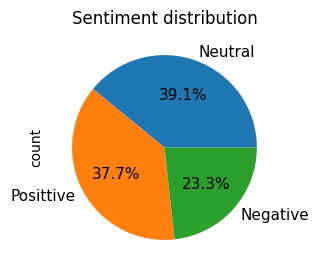

In [191]:
df['sentiment_label'].value_counts().plot(kind='pie',
                                title='Sentiment distribution',
                                autopct='%1.1f%%',  # This shows percentages
                                rot=0, 
                                fontsize=11, 
                                figsize=(8,3))

14. Create pie chart for sentiment distribution using plotly

In [192]:
import plotly.express as px

df_sentiment = df['sentiment_label'].value_counts().reset_index()
# rest_index() tt converts the Series into a proper DataFrame
df_sentiment.columns = ['sentiment_label', 'count']
colors = ['grey', 'cyan', 'red']

# Create the pie chart
fig = px.pie(df_sentiment, 
             values='count', 
             names='sentiment_label',
             title='Sentiment distribution',
             hole=0.5,  
             width=600, 
             height=600)

# Update layout to show percentages (they're shown by default, but you can customize)
fig.update_traces(marker_colors=colors, textposition='inside', textinfo='percent+label',hovertemplate="<b>%{label}</b><br>Count: %{value}<br>Percentage: %{percent}<extra></extra>")
fig.update_layout(font=dict(size=11))

fig.show()

15. Create line graph to show the total post of the 4 subreddits from 2021 to 2025

subreddit  StockMarket  stocks  stockstobuytoday  wallstreetbets
datetime                                                        
2021                 0      41                58               0
2022                 0       0                22               0
2023                 0       0                14               0
2024                 0       0                22               0
2025               250     233                58             149


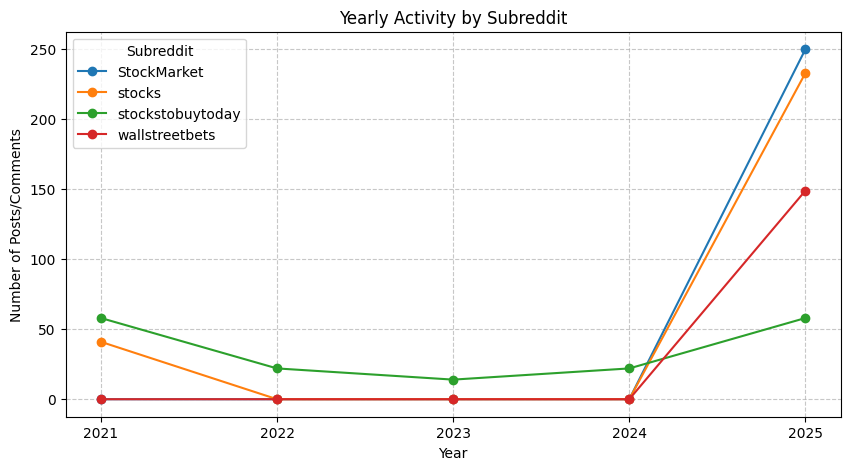

In [193]:
df['datetime'] = pd.to_datetime(df['datetime'])
df_time_table = df.groupby([df['datetime'].dt.year, 'subreddit']).size().unstack(fill_value=0)

# unstack()
# - Takes the innermost level of a MultiIndex (here: 'subreddit')
# - Pivots it into columns
# - Turns a Series (with 2D index: year + subreddit) into a DataFrame (years as rows, subreddits as columns)

# fill_value=0 fills any missing combinations with 0

print(df_time_table)

df_time_table.plot(kind='line', 
                   marker='o',          # adds dots at data points
                   figsize=(10,5))
plt.title('Yearly Activity by Subreddit')
plt.ylabel('Number of Posts/Comments')
plt.xlabel('Year')
plt.grid(True, linestyle='--', alpha=0.7)  # adds subtle grid for readability
plt.legend(title='Subreddit')
plt.xticks(df_time_table.index)  # ensures all years are shown as ticks
plt.show()

16. Create boxplot to show the distribution of a variable across 4 categories

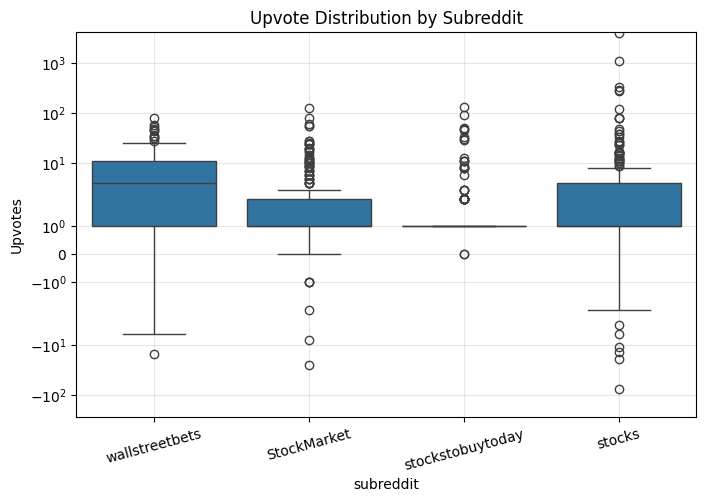

In [194]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='subreddit', y='upvotes')
plt.title('Upvote Distribution by Subreddit')
plt.ylabel('Upvotes')
plt.xticks(rotation=15)
plt.yscale('symlog')  # handles large negative and positive values (Outliers)
plt.grid(True, alpha=0.3)
plt.show()

# Phase 2

In [195]:
### Begin Assignment Here